In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transformaciones de datos
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config

# GCP
from google.cloud import bigquery, aiplatform, storage
import pickle
import re
import sklearn
import logging

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as imbPipeline
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import logging
import pickle

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

set_config(display="diagram")
pd.set_option("display.max_columns", None)

os.chdir("/home/jupyter/bbog-gd-seguros-churn-ml/")

In [4]:
import src.nlp.pipelines.data_processing.nodes as processing
import src.nlp.pipelines.primary.nodes as primary
import src.nlp.pipelines.feature.nodes as feature
import src.nlp.pipelines.model_input.nodes as model

In [5]:
%load_ext kedro.ipython

[10/13/24 20:50:28] INFO     Resolved project path as: /home/jupyter/bbog-gd-seguros-churn-ml.      ]8;id=440533;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=292010;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/framework ]8;id=840363;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=912520;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             /startup.py:99: KedroDeprecationWarning: project_version in                           
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[10/13/24 20:50:29] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/__init ]8;id=53888;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=678711;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             __.py:44: KedroDeprecationWarning: 'AbstractDataSet' has been renamed                 
                             to 'AbstractDataset', and the alias will be removed in Kedro 0.19.0                   
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

[10/13/24 20:50:29] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/framework ]8;id=237099;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=657947;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             /session/session.py:267: KedroDeprecationWarning: ConfigLoader will be                
                             deprecated in Kedro 0.19. Please use the OmegaConfigLoader instead. To                
                             consult the documentation for OmegaConfigLoader, see here:                            
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=129801;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=52311;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/csv_dataset.py:12: KedroDeprecationWarning:                                    
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=498974;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=271818;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/csv_dataset.py:12: KedroDeprecationWarning: 'DataSetError' has                 
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=476222;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=357712;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/excel_dataset.py:12: KedroDeprecationWarning:                                  
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=370417;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=254641;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/excel_dataset.py:12: KedroDeprecationWarning: 'DataSetError'                   
                             has been renamed to 'DatasetError', and the alias will be removed in                  
                             Kedro 0.19.0                                                                          
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=349165;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=467046;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/feather_dataset.py:13: KedroDeprecationWarning:                                
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=284569;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=7377;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/gbq_dataset.py:14: KedroDeprecationWarning: 'AbstractDataSet'                  
                             has been renamed to 'AbstractDataset', and the alias will be removed                  
                             in Kedro 0.19.0                                                                       
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=530417;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=306390;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/gbq_dataset.py:14: KedroDeprecationWarning: 'DataSetError' has                 
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=577109;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=304769;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/hdf_dataset.py:11: KedroDeprecationWarning:                                    
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=496594;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=257885;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/hdf_dataset.py:11: KedroDeprecationWarning: 'DataSetError' has                 
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=520160;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=255567;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/json_dataset.py:12: KedroDeprecationWarning:                                   
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=369396;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=263695;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/json_dataset.py:12: KedroDeprecationWarning: 'DataSetError' has                
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=28120;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=617518;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/parquet_dataset.py:12: KedroDeprecationWarning:                                
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=328281;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=664289;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/parquet_dataset.py:12: KedroDeprecationWarning: 'DataSetError'                 
                             has been renamed to 'DatasetError', and the alias will be removed in                  
                             Kedro 0.19.0                                                                          
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=992780;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=36209;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/sql_dataset.py:10: KedroDeprecationWarning: 'AbstractDataSet'                  
                             has been renamed to 'AbstractDataset', and the alias will be removed                  
                             in Kedro 0.19.0                                                                       
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=671972;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=579690;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/sql_dataset.py:10: KedroDeprecationWarning: 'DataSetError' has                 
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=86292;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=193173;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/xml_dataset.py:12: KedroDeprecationWarning:                                    
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=652330;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=749542;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/xml_dataset.py:12: KedroDeprecationWarning: 'DataSetError' has                 
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=378389;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=886577;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/generic_dataset.py:11: KedroDeprecationWarning:                                
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=475647;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=919230;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pandas/generic_dataset.py:11: KedroDeprecationWarning: 'DataSetError'                 
                             has been renamed to 'DatasetError', and the alias will be removed in                  
                             Kedro 0.19.0                                                                          
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/data_c ]8;id=958502;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=630184;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             atalog.py:301: KedroDeprecationWarning: Defining the 'layer' attribute                
                             at the top level is deprecated and will be removed in Kedro 0.19.0.                   
                             Please move 'layer' inside the 'metadata' -> 'kedro-viz' attributes.                  
                             See                                                                                   
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=953428;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=797814;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pickle/pickle_dataset.py:12: KedroDeprecationWarning:                                 
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=215506;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=887136;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pickle/pickle_dataset.py:12: KedroDeprecationWarning: 'DataSetError'                  
                             has been renamed to 'DatasetError', and the alias will be removed in                  
                             Kedro 0.19.0                                                                          
                               from kedro.io.core import (                                                         
                                                                                                                   

                    INFO     Kedro project bbog-gd-seguros-churn-ml                                 ]8;id=462800;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=954320;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=696669;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=814528;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

[10/13/24 20:50:30] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/__init ]8;id=565704;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=656330;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             __.py:44: KedroDeprecationWarning: 'AbstractDataSet' has been renamed                 
                             to 'AbstractDataset', and the alias will be removed in Kedro 0.19.0                   
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_viz/model ]8;id=170779;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=731169;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             s/flowchart.py:20: KedroDeprecationWarning: 'DataSetError' has been                   
                             renamed to 'DatasetError', and the alias will be removed in Kedro                     
                             0.19.0                                                                                
                               from kedro.io.core import VERSION_FORMAT, DataSetError                              
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/__init ]8;id=906944;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=374849;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             __.py:44: KedroDeprecationWarning: 'DataSetNotFoundError' has been                    
                             renamed to 'DatasetNotFoundError', and the alias will be removed in                   
                             Kedro 0.19.0                                                                          
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/__init ]8;id=680056;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=935465;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             __.py:44: KedroDeprecationWarning: 'AbstractVersionedDataSet' has been                
                             renamed to 'AbstractVersionedDataset', and the alias will be removed                  
                             in Kedro 0.19.0                                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=864412;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=933864;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             json/json_dataset.py:10: KedroDeprecationWarning:                                     
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=217067;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=972379;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             json/json_dataset.py:10: KedroDeprecationWarning: 'DataSetError' has                  
                             been renamed to 'DatasetError', and the alias will be removed in Kedro                
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=349627;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=332007;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             matplotlib/matplotlib_writer.py:12: KedroDeprecationWarning:                          
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=963801;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=164062;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             matplotlib/matplotlib_writer.py:12: KedroDeprecationWarning:                          
                             'DataSetError' has been renamed to 'DatasetError', and the alias will                 
                             be removed in Kedro 0.19.0                                                            
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=542681;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=647935;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             plotly/json_dataset.py:10: KedroDeprecationWarning:                                   
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=944463;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=558410;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             tracking/metrics_dataset.py:9: KedroDeprecationWarning: 'DataSetError'                
                             has been renamed to 'DatasetError', and the alias will be removed in                  
                             Kedro 0.19.0                                                                          
                               from kedro.io.core import DataSetError, get_filepath_str                            
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro_datasets/ ]8;id=750690;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=160612;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             tracking/json_dataset.py:7: KedroDeprecationWarning: 'DataSetError'                   
                             has been renamed to 'DatasetError', and the alias will be removed in                  
                             Kedro 0.19.0                                                                          
                               from kedro.io.core import DataSetError                                              
                                                                                                                   

                    INFO     Registered line magic 'run_viz'                                        ]8;id=327263;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=460795;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [17]:
%reload_kedro

[10/13/24 16:04:05] INFO     Resolved project path as: /home/jupyter/bbog-gd-seguros-churn-ml.      ]8;id=471131;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=674358;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/framework ]8;id=640650;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=757994;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             /startup.py:99: KedroDeprecationWarning: project_version in                           
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[10/13/24 16:04:05] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/framework ]8;id=678820;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=20104;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             /session/session.py:267: KedroDeprecationWarning: ConfigLoader will be                
                             deprecated in Kedro 0.19. Please use the OmegaConfigLoader instead. To                
                             consult the documentation for OmegaConfigLoader, see here:                            
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/data_c ]8;id=613322;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=247107;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             atalog.py:301: KedroDeprecationWarning: Defining the 'layer' attribute                
                             at the top level is deprecated and will be removed in Kedro 0.19.0.                   
                             Please move 'layer' inside the 'metadata' -> 'kedro-viz' attributes.                  
                             See                                                                                   
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project bbog-gd-seguros-churn-ml                                 ]8;id=84068;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=38866;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=71475;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=894233;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=830442;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=953417;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/ipython/__init__.py#115\115]8;;\

# Lectura archivos Excel

In [12]:
# el archivo esta guardo de forma local
%%time
df=pd.read_csv('data/01_raw/Consumer_Complaints.csv')

CPU times: user 8.71 s, sys: 708 ms, total: 9.42 s
Wall time: 19.3 s


In [6]:
# Como se leen los parámetros desde Python
params = catalog.load("parameters")

[10/13/24 20:50:32] INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=420888;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=398058;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [5]:
df.shape

(1025010, 19)

In [6]:
df.dtypes

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer Complaint               object
Company Public Response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date Sent to Company             object
Company Response to Consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                      int64
Unnamed: 18                     float64
dtype: object

# Entendimiento de lo datos EDA 

Se realiza un analisis descriptivo emdiante la libreria de pandas profiling para establecer
relaciones y hacer un entendimiento de los datos , ver posibles hipotesis , ver compononentes para
analisis univariado o bivariado en caso de ser necesario 

In [23]:
import pandas as pd
from ydata_profiling import ProfileReport
# Crear el reporte de perfil
profile = ProfileReport(df, title="NLP Report primary")

# Guardar el reporte
profile.to_file("your_report_pramary.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

* Se establece la hipotesis : existe una efectividad de respuesta segun el canal 

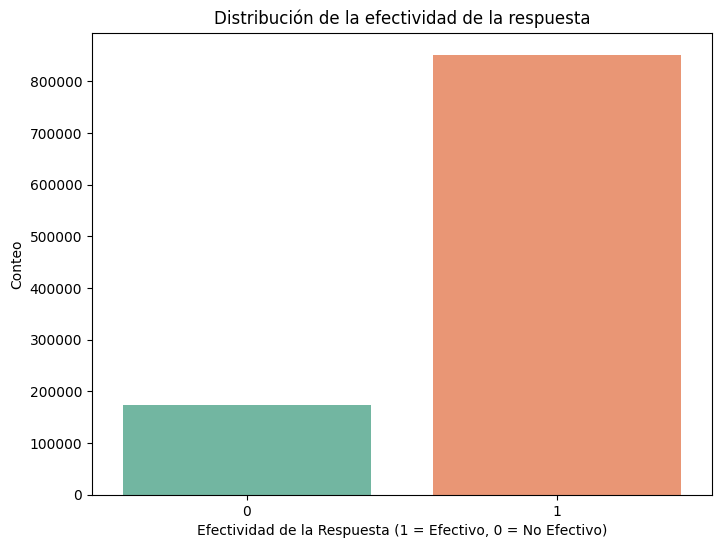

In [8]:
# Gráfico 1: Distribución de la efectividad de la respuesta
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='effective_response', palette='Set2')
plt.title('Distribución de la efectividad de la respuesta')
plt.xlabel('Efectividad de la Respuesta (1 = Efectivo, 0 = No Efectivo)')
plt.ylabel('Conteo')
plt.show()



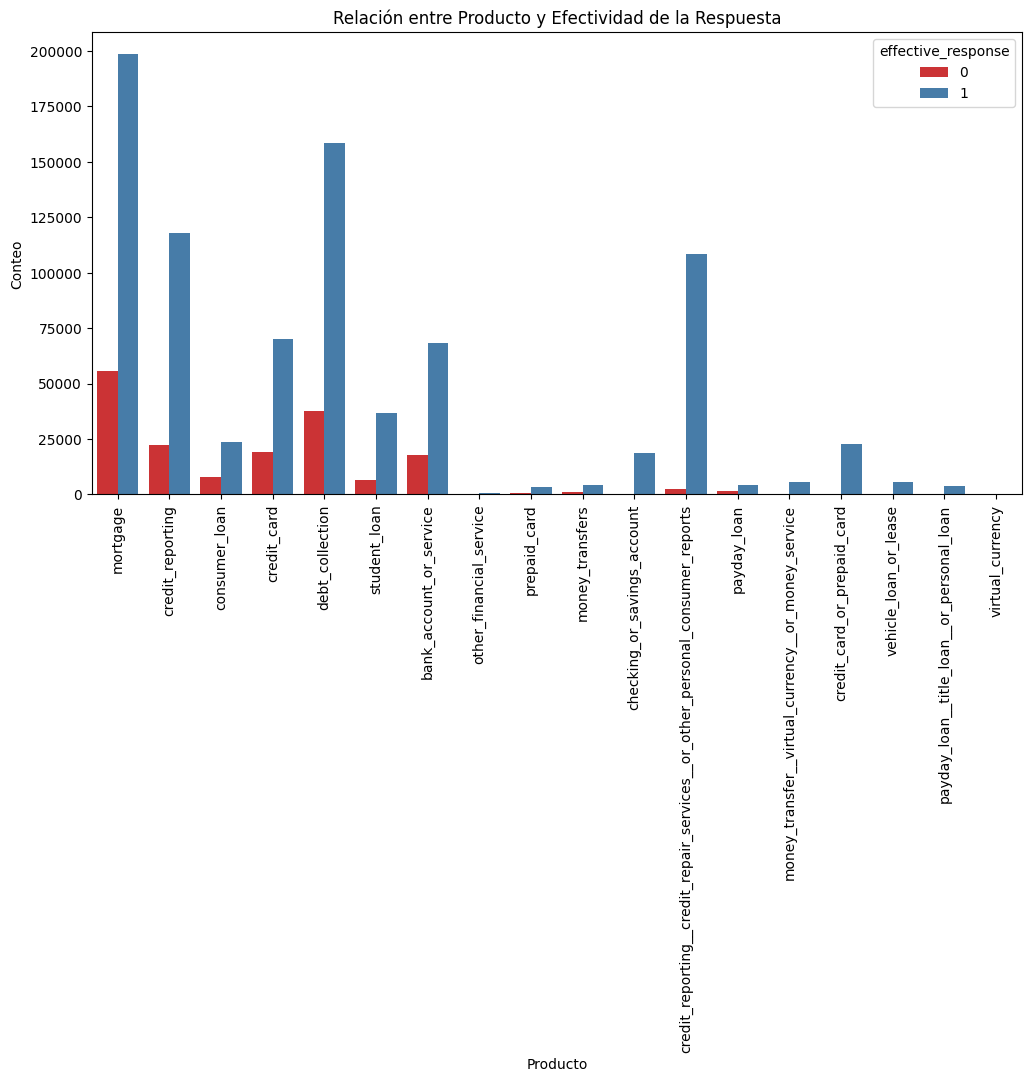

In [10]:
# Gráfico 2: Relación entre el Producto y la Efectividad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product', hue='effective_response', palette='Set1')
plt.title('Relación entre Producto y Efectividad de la Respuesta')
plt.xlabel('Producto')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()



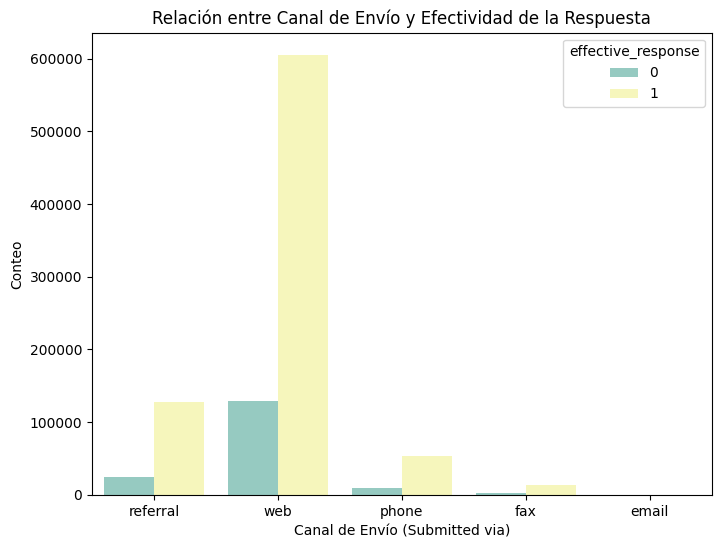

In [8]:
# Limpiar los valores no válidos en 'Submitted via'
valid_channels = ['web', 'phone', 'postal mail', 'fax', 'email', 'referral']
df_cleaned = df[df['submitted via'].isin(valid_channels)]

# Gráfico 3: Relación entre el Canal (Submitted via) y la Efectividad
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='submitted via', hue='effective_response', palette='Set3')
plt.title('Relación entre Canal de Envío y Efectividad de la Respuesta')
plt.xlabel('Canal de Envío (Submitted via)')
plt.ylabel('Conteo')
plt.show()


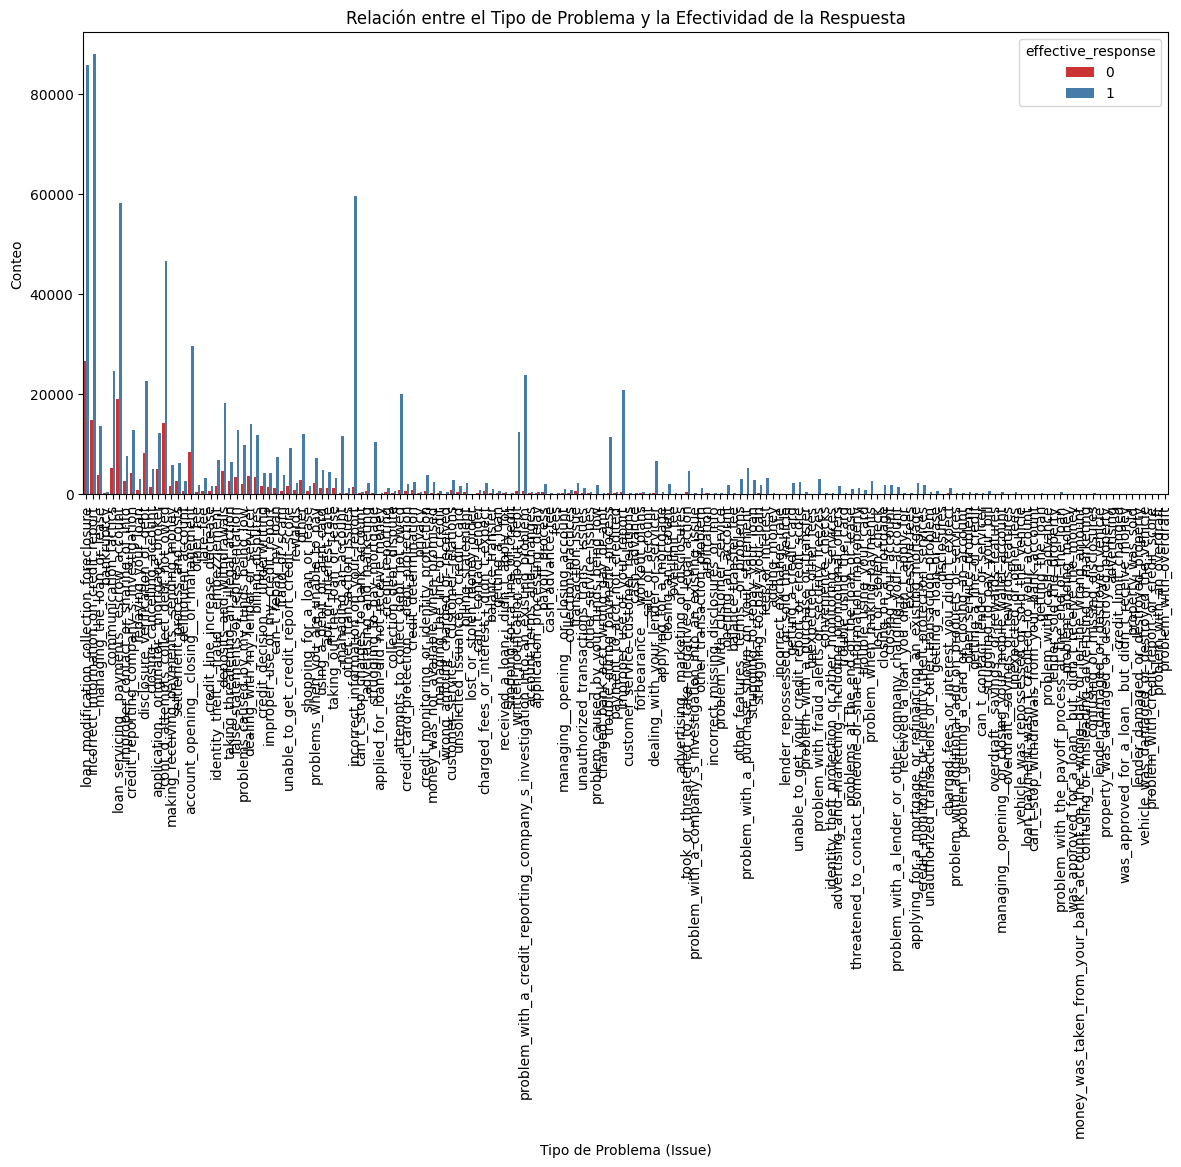

In [16]:

# Gráfico 4: Relación entre el Tipo de Problema (Issue) y la Efectividad
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='issue', hue='effective_response', palette='Set1')
plt.title('Relación entre el Tipo de Problema y la Efectividad de la Respuesta')
plt.xlabel('Tipo de Problema (Issue)')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

In [20]:
import scipy.stats as stats
import numpy as np

# 1. Prueba de chi-cuadrado para determinar si existe una relación significativa entre el canal de envío y la efectividad de la respuesta.

# Crear una tabla de contingencia entre 'Submitted via' y 'effective_response'
contingency_table = pd.crosstab(df_cleaned['submitted via'], df_cleaned['effective_response'])

# Realizar la prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Resultado de la prueba chi-cuadrado
chi2_result = {
    "chi2_statistic": chi2,
    "p_value": p_value,
    "degrees_of_freedom": dof
}
print(chi2_result)


{'chi2_statistic': 364.2376156993728, 'p_value': 1.4775413793950062e-77, 'degrees_of_freedom': 4}


* Es muy probable que el canal por el cual se envía tenga un impacto significativo en la efectividad de la respuesta. Esto podría indicar que ciertos canales son más eficientes o adecuados que otros para obtener respuestas efectivas como la seleccion de envio de NPS , seguimiento de casos por ejemplo.

In [10]:
# 2. Matriz de correlación para ver la relación entre las variables categóricas (codificamos las variables categóricas).
# Convertimos las variables categóricas en numéricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned[['product', 'submitted via']], drop_first=True)

# Agregamos la variable objetivo 'effective_response'
df_encoded['effective_response'] = df_cleaned['effective_response']

# Generar la matriz de correlación
#correlation_matrix = df_encoded.corr()

#correlation_matrix

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vamos a aplicar TF-IDF tanto a la columna 'Issue' como a 'Company'. 
# Limitaremos las palabras más relevantes a un número manejable para evitar problemas de dimensionalidad.

# Aplicamos TF-IDF a 'Issue'
tfidf_issue = TfidfVectorizer(max_features=100)  # Limita a las 100 palabras más relevantes
issue_tfidf = tfidf_issue.fit_transform(df_cleaned['issue'].fillna(''))  # Aplicar TF-IDF y manejar valores nulos

# Aplicamos TF-IDF a 'Company'
tfidf_company = TfidfVectorizer(max_features=100)  # Limita a las 100 palabras más relevantes
company_tfidf = tfidf_company.fit_transform(df_cleaned['company'].fillna(''))  # Aplicar TF-IDF y manejar valores nulos

# Convertimos los resultados de TF-IDF en DataFrames para poder concatenarlos al DataFrame original
issue_tfidf_df = pd.DataFrame(issue_tfidf.toarray(), columns=tfidf_issue.get_feature_names_out())
company_tfidf_df = pd.DataFrame(company_tfidf.toarray(), columns=tfidf_company.get_feature_names_out())

# Concatenamos las nuevas características de 'Issue' y 'Company' al DataFrame original (quitamos las columnas originales de 'Issue' y 'Company')
df_nlp = pd.concat([df_cleaned.reset_index(drop=True), issue_tfidf_df, company_tfidf_df,df_encoded], axis=1).drop(columns=['issue', 'company'])

# Mostramos el DataFrame resultante después de aplicar NLP
df_nlp.head()


,date received,product,sub-product,sub-issue,company public response,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,consumer disputed?,complaint id,effective_response,account_opening__closing__or_management,advertising_and_marketing,advertising_and_marketing__including_promotional_offers,application__originator__mortgage_broker,application_processing_delay,applying_for_a_mortgage_or_refinancing_an_existing_mortgage,apr_or_interest_rate,attempts_to_collect_debt_not_owed,balance_transfer,billing_disputes,billing_statement,can_t_contact_lender,can_t_repay_my_loan,can_t_stop_charges_to_bank_account,charged_fees_or_interest_i_didn_t_expect,charged_fees_or_interest_you_didn_t_expect,closing_an_account,closing_cancelling_account,closing_on_a_mortgage,closing_your_account,collection_debt_dispute,collection_practices,communication_tactics,cont_d_attempts_collect_debt_not_owed,credit_card_protection___debt_protection,credit_decision___underwriting,credit_determination,credit_line_increase_decrease,credit_monitoring_or_identity_protection,credit_monitoring_or_identity_theft_protection_services,credit_reporting,credit_reporting_company_s_investigation,customer_service___customer_relations,dealing_with_my_lender_or_servicer,dealing_with_your_lender_or_servicer,delinquent_account,deposits_and_withdrawals,disclosure_verification_of_debt,false_statements_or_representation,fees_or_interest,forbearance___workout_plans,fraud_or_scam,getting_a_credit_card,getting_a_loan,getting_a_loan_or_lease,identity_theft___fraud___embezzlement,improper_contact_or_sharing_of_info,improper_use_of_my_credit_report,improper_use_of_your_report,incorrect_information_on_credit_report,incorrect_information_on_your_report,late_fee,loan_modification_collection_foreclosure,loan_servicing__payments__escrow_account,making_receiving_payments__sending_money,managing__opening__or_closing_account,managing_an_account,managing_the_line_of_credit,managing_the_loan_or_lease,money_was_not_available_when_promised,opening_an_account,other,other_features__terms__or_problems,other_fee,other_service_issues,other_transaction_issues,other_transaction_problem,payoff_process,privacy,problem_caused_by_your_funds_being_low,problem_when_making_payments,problem_with_a_credit_reporting_company_s_investigation_into_an_existing_problem,problem_with_a_lender_or_other_company_charging_your_account,problem_with_a_purchase_shown_on_your_statement,problem_with_fraud_alerts_or_security_freezes,problems_at_the_end_of_the_loan_or_lease,problems_caused_by_my_funds_being_low,problems_when_you_are_unable_to_pay,received_a_loan_i_didn_t_apply_for,repaying_your_loan,rewards,settlement_process_and_costs,shopping_for_a_loan_or_lease,struggling_to_pay_mortgage,struggling_to_pay_your_bill,struggling_to_pay_your_loan,struggling_to_repay_your_loan,taking_out_the_loan_or_lease,taking_threatening_an_illegal_action,threatened_to_contact_someone_or_share_information_improperly,took_or_threatened_to_take_negative_or_legal_action,transaction_issue,trouble_during_payment_process,trouble_using_your_card,unable_to_get_credit_report_credit_score,unable_to_get_your_credit_report_or_credit_score,unauthorized_transactions_trans__issues,unsolicited_issuance_of_credit_card,using_a_debit_or_atm_card,written_notification_about_debt,_associates__inc_,_co_,_company,acs_education_services,ad_astra_recovery_services_inc,aes_pheaa,afni_inc_,alliance_data_card_services,allied_interstate_llc,ally_financial_inc_,american_express_company,bank_of_america__national_association,barclays_bank_delaware,bayview_loan_servicing__llc,bb,bbva_compass_financial_corporation,bmo_harris_bank_national_association,caliber_home_loans__inc_,capital_one_financial_corporation,carrington_mortgage_services__llc,cashcall__inc_,cavalry_investments__llc,ccs_financial_services__inc_,cit_bank__national_association,citibank__n_a_,citizens_financial_group__inc_,cl_holdings_llc,coinbase__inc_,co

# Procesamiento 

Se llaman las funciones generadas en el pipeline como ejercicio visual en caso que sea encesario , para esto previamente se hizo la importacion de los objentos necesarios , el resultado se pueden guardar en bucket como archivos parquet 

* Se estandarizan las variables de entrada como manejar toda la informacion en minusculas y quitar carecteres especiales

In [9]:
df.shape

(1025010, 19)

In [10]:
df= processing.convertir_a_minusculas(df, params)

In [11]:
df= processing.standardize_strings(df, params)
df= processing.values_to_null(df)

# Primary

En este pipeline se efecutan las siguientes funciones :
* remover duplicados
* imputacion de valores faltantes 
* creacion de la variable objetivo : que se crea mendiante la efectividad de respuesta sin apelacion por parte del usuario  

In [12]:
df= primary.remove_duplicates(df)

In [13]:
df= primary.clean_dataframe_by_missing_values(df, params)

In [14]:
df= primary.impute_missing_values(df)

In [15]:
df=primary.create_effective_response(df)

In [ ]:
df= primary.remove_duplicates(df)
df= primary.clean_dataframe_by_missing_values(df, params)
df= primary.impute_missing_values(df)
df=primary.create_effective_response(df)

# Feature

In [16]:
df= feature.create_interactions(df)

In [17]:
df= feature.vectorize_text_tfidf(df,params['tfidf'])

[10/13/24 18:49:45] WARNING  /home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pi ]8;id=329357;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=789358;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pelines/feature/nodes.py:54: SettingWithCopyWarning:                                  
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[column] = df[column].fillna('').astype(str)                                      
                                                                                                                   

In [18]:
df=feature.encode_one_hot(df,params['column_product'])

In [19]:
df= feature.calculate_text_length(df,params['column_issue'])

In [20]:
df= feature.calculate_sentiment(df,params['column_response'])

In [21]:
df= feature.add_temporal_features(df)

In [22]:
df,importances_df=feature.calcular_importancia_caracteristicas(df,params['top_n'])

[10/13/24 19:05:25] WARNING  /home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pi ]8;id=787920;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=777464;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pelines/feature/nodes.py:184: SettingWithCopyWarning:                                 
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df_filtrado['effective_response']=df_numeric['effective_response']                  
                                                                                                                   

                    WARNING  /home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pi ]8;id=572081;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=500714;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pelines/feature/nodes.py:185: SettingWithCopyWarning:                                 
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df_filtrado['complaint id']=df_numeric['complaint id']                              
                                                                                                                   

                    WARNING  /home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pi ]8;id=400645;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=878828;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             pelines/feature/nodes.py:186: SettingWithCopyWarning:                                 
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df_filtrado['date_received']=df_numeric['date_received']                            
                                                                                                                   

# Model input

En este pipeline en particular tenemos varias funciones que nos permiten realizar un analisis 
a profundidad debido a que se implemento un grilla para hacer bsuqueda de hiperparametros 
adicionalmente se tienen en cuenta algunos factores para la lectura y calificacion del modelo para  a produccion 

In [7]:
df_filtrado=catalog.load("df_filtrado")

[10/13/24 20:50:49] INFO     Loading data from 'df_filtrado' (ParquetDataSet)...                ]8;id=557781;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=830074;file:///opt/conda/envs/py39_churn/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [28]:
df_filtrado.shape

(1025004, 33)

In [8]:
model_search,report_train,report_test= model.create_final_pipeline(df_filtrado,params)

[10/13/24 20:50:54] INFO     Distribución después del undersampling:                                    ]8;id=978454;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=510845;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     1.0    599576                                                              ]8;id=283420;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=401707;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#54\54]8;;\
                             0.0    225569                                                                         
                             Name: effective_response, dtype: int64                                                

[10/13/24 20:59:29] INFO     Distribución después del overrsampling:                                   ]8;id=39543;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=514447;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#196\196]8;;\

                    INFO     1.0    419703                                                             ]8;id=527129;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=211943;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#197\197]8;;\
                             0.0    419703                                                                         
                             Name: effective_response, dtype: int64                                                

                    INFO     Scale_pos_weight calculado: 1.0                                           ]8;id=482042;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=287505;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#202\202]8;;\

[10/13/24 20:59:30] WARNING  No hay columnas categóricas para codificar.                               ]8;id=56430;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=248502;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#115\115]8;;\

Fitting 2 folds for each of 5 candidates, totalling 10 fits


                    WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=456689;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=537063;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:30] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:33] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=793;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=141242;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:33] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:36] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=424682;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=807568;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:36] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:38] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=133484;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=303119;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:38] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:39] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=793842;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=209192;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:39] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:40] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=543926;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=408421;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:40] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:42] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=102895;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=869778;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:42] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:44] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=536818;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=392850;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:44] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:46] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=982818;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=532162;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:46] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:48] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=78407;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=197125;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:48] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:51] WARNING  /opt/conda/envs/py39_churn/lib/python3.9/site-packages/xgboost/core.py ]8;id=264658;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=453905;file:///opt/conda/envs/py39_churn/lib/python3.9/warnings.py#109\109]8;;\
                             :158: UserWarning: [20:59:51] WARNING: /workspace/src/learner.cc:740:                 
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[10/13/24 20:59:56] INFO     Reporte de clasificación en el conjunto de entrenamiento:                 ]8;id=149067;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=5102;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#220\220]8;;\
                                           precision    recall  f1-score   support                                 
                                                                                                                   
                                      0.0       0.82      0.47      0.60    419703                                 
                                      1.0       0.63      0.89      0.74    419703                                 
                                                                                                                   
                                 accuracy                           0.68    839406                                 
                                macro avg       0.72      0.68      0.67    839406                                 
                             weighted avg       0.72      0.68      0.67    839406                                 
                                                                                                                   

                    INFO     Exactitud en el conjunto de entrenamiento: 0.6821478521716547             ]8;id=52128;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=618006;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#221\221]8;;\

                    INFO     Reporte de clasificación en el conjunto de prueba:                        ]8;id=610877;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=943162;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#226\226]8;;\
                                           precision    recall  f1-score   support                                 
                                                                                                                   
                                      0.0       0.59      0.40      0.48     67671                                 
                                      1.0       0.80      0.89      0.84    179873                                 
                                                                                                                   
                                 accuracy                           0.76    247544                                 
                                macro avg       0.69      0.65      0.66    247544                                 
                             weighted avg       0.74      0.76      0.74    247544                                 
                                                                                                                   

                    INFO     Exactitud en el conjunto de prueba: 0.7590327376143231                    ]8;id=632209;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=630130;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#227\227]8;;\

In [14]:
def parse_classification_report(report):
        """
        Función auxiliar para convertir un string de reporte de clasificación en un DataFrame.
        """
        lines = report.split('\n')
        rows = []
        for line in lines[2:-3]:  # Ignorar las primeras dos y últimas tres líneas
            line = line.strip().split()
            if len(line) > 0:
                rows.append(line)
        columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
        return pd.DataFrame(rows, columns=columns)
    
# Convertir ambos reportes en DataFrames
df_train_report = parse_classification_report(report_train)
df_test_report = parse_classification_report(report_test)

output_path='gs://bdb-gcp-cds-pr-ac-ba-analitica-avanzada/tutorial-aa/data/01_raw/report_test.xlsx'
# Guardar ambos DataFrames en un archivo Excel con diferentes hojas
with pd.ExcelWriter(output_path) as writer:
    df_train_report.to_excel(writer, sheet_name='Train Report', index=False)
    df_test_report.to_excel(writer, sheet_name='Test Report', index=False)

In [21]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades predichas para el conjunto de prueba
y_pred_proba = model_search.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Imprimir o graficar la curva ROC y el valor del AUC
logger.info(f"AUC: {roc_auc}")


[10/14/24 03:38:27] INFO     AUC: 0.7437386240558008                                               ]8;id=155260;file:///var/tmp/ipykernel_68175/4129796195.py\4129796195.py]8;;\:]8;id=163705;file:///var/tmp/ipykernel_68175/4129796195.py#13\13]8;;\

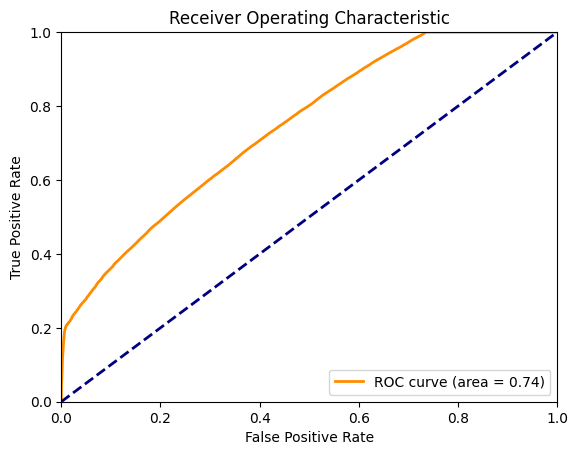

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix
y_pred_test = model_search.predict(X_test)
# Calcular la matriz de confusión para el conjunto de prueba
cm = confusion_matrix(y_test, y_pred_test)

# Imprimir o registrar la matriz de confusión
logger.info(f"Matriz de confusión:\n{cm}")


[10/14/24 03:39:35] INFO     Matriz de confusión:                                                   ]8;id=3266;file:///var/tmp/ipykernel_68175/2042056037.py\2042056037.py]8;;\:]8;id=129471;file:///var/tmp/ipykernel_68175/2042056037.py#7\7]8;;\
                             [[ 26989  40682]                                                                      
                              [ 18968 160905]]                                                                     

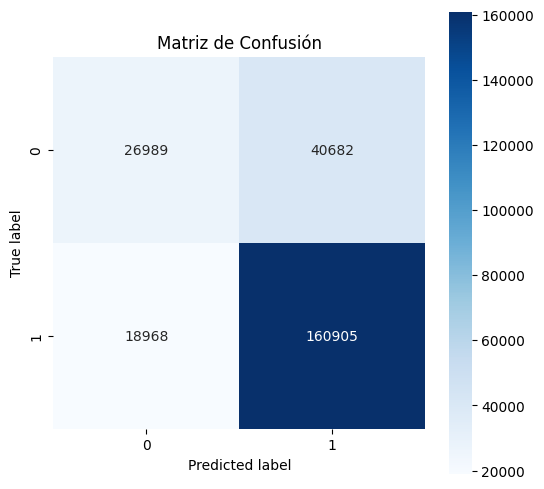

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()


## Pruebas 

In [19]:
df_balanced= model.apply_undersampling(df_filtrado, params['target_reduction'], params['random_state'])

[10/14/24 03:38:14] INFO     Distribución después del undersampling:                                    ]8;id=767227;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=926351;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     1.0    599576                                                              ]8;id=432647;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=402600;file:///home/jupyter/bbog-gd-seguros-churn-ml/src/bbog_gd_seguros_churn_ml/pipelines/model_input/nodes.py#54\54]8;;\
                             0.0    225569                                                                         
                             Name: effective_response, dtype: int64                                                

In [20]:
X_train, X_test, y_train, y_test= model.split_data(df_balanced, params)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as imbPipeline
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np
import logging

In [17]:
pipeline=model.create_pipeline_with_feature_engineering(df_balanced)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/tmp/ipykernel_54020/553454005.py:1 in <cell line: 1>                                        │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/var/tmp/ipykernel_54020/553454005.py'                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: create_pipeline_with_feature_engineering() missing 1 required positional argument: 'scale_pos_weight'

In [13]:
model_search= model.model_selection_builder(pipeline,params)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/tmp/ipykernel_54020/519672655.py:1 in <cell line: 1>                                        │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/var/tmp/ipykernel_54020/519672655.py'                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'pipeline' is not defined

### Resultados

In [17]:
model_search

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['month',
                                                                                'day_of_week',
                                                                                'submitted '
                                                                                'via_None',
                                                                                'product_None',
                                                                                'sub-product_None',
                                                                                'company '
                                                                                'public '
                                                                                'response_sentiment',
                                                                                'submitted '
                                                                                'via_web',
                                                                                'product_credit_reporting__credit_repair_services__or_other_personal_consumer_reports',
                                                                                'co...
                                                            random_state=None, ...))]),
                   n_iter=5,
                   param_distributions={'classifier__colsample_bytree': array([0.5, 0.8]),
                                        'classifier__gamma': array([0., 1.]),
                                        'classifier__learning_rate': array([0.01, 0.1 ]),
                                        'classifier__max_depth': array([ 2, 10]),
                                        'classifier__n_estimators': array([ 50,  75, 100]),
                                        'classifier__subsample': array([0.5, 0.8])},
                   random_state=42, refit='f1', scoring='f1', verbose=1)

In [16]:
import pickle
# Especifica la ruta donde deseas leer el archivo pickle
ruta = 'data/06_models/model_search.pkl'

# Guarda el objeto en formato pickle en la ruta especificada
with open(ruta, 'rb') as archivo_pickle:
    pickle.dump(model_search, archivo_pickle)

print(f"Archivo guardado en {ruta}")


Archivo guardado en data/06_models/model_search.pkl


# Model output 

In [ ]:
df_calificado= model_output.model_output(df, importances_df, params, model_search)